In [31]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [35]:
songs = pd.read_csv('spotify-2023.csv', encoding='latin-1', decimal=",")
songs.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6


In [41]:
songs.rename(columns = {'energy_%':'energy'}, inplace=True)
dance_songs_shazamed = songs[['energy', 'in_shazam_charts']]
dance_songs_shazamed.head()
# dance_songs_shazamed.describe()

,energy,in_shazam_charts
0,83,826.0
1,74,382.0
2,53,949.0
3,72,548.0
4,80,425.0


Text(0, 0.5, 'Количество шазам-чартов')

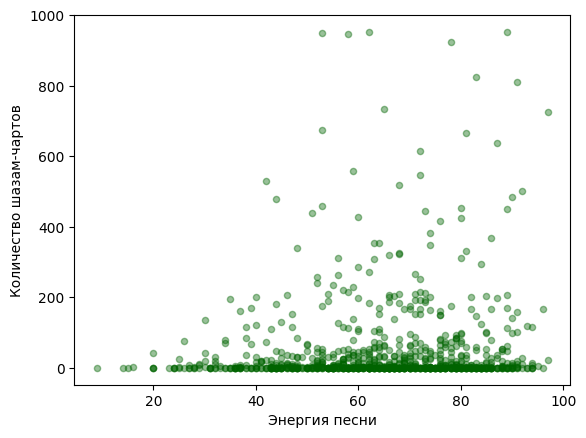

In [45]:
dance_songs_shazamed.plot.scatter(x='energy', y='in_shazam_charts', c='DarkGreen', alpha=0.4)
plt.xlabel('Энергия песни')
plt.ylabel('Количество шазам-чартов')

In [61]:
#MODEL
model = LinearRegression()
dance_songs_shazamed = dance_songs_shazamed.fillna(0)
X = pd.DataFrame(dance_songs_shazamed.energy)
y = pd.DataFrame(dance_songs_shazamed.in_shazam_charts)
model.fit(X,y)
model.coef_

array([[0.73985842]])

In [62]:
model.intercept_

array([0.56671032])

Text(0, 0.5, 'Количество шазам-чартов')

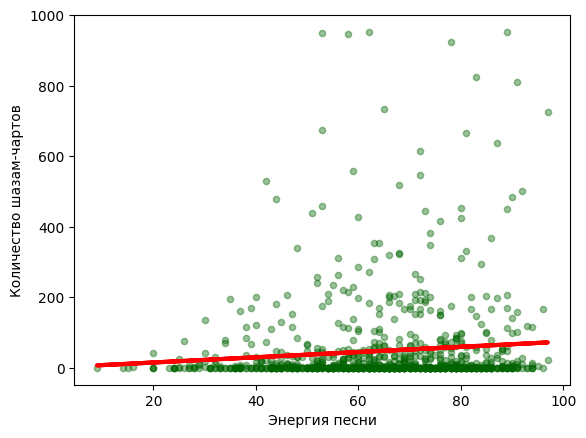

In [66]:
dance_songs_shazamed.plot.scatter(x='energy', y='in_shazam_charts', c='DarkGreen', alpha=0.4)
plt.plot(X, model.predict(X), color='Red', linewidth=3)
plt.xlabel('Энергия песни')
plt.ylabel('Количество шазам-чартов')

In [67]:
model.score(X,y)

0.009872444162058791